In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/python/june-Sheet.csv')

In [ ]:
print(df)

              Name         Date Days Shift     In    Out Hours Worked Status  \
0     Nachiket Soni  01/06/2024  Sat   S01    NaN    NaN          NaN      A   
1     Nachiket Soni  02/06/2024  Sun   OFF    NaN    NaN          NaN     WO   
2     Nachiket Soni  03/06/2024  Mon   S01  10:27  19:41     09:14:00      P   
3     Nachiket Soni  04/06/2024  Tue   S01  10:45  20:01     09:16:00      P   
4     Nachiket Soni  05/06/2024  Wed   S01  11:12  19:48     08:36:00      P   
..              ...         ...  ...   ...    ...    ...          ...    ...   
211  Navshree Yadav  26/06/2024  Wed   S01  10:55  19:41     08:46:00      P   
212  Navshree Yadav  27/06/2024  Thu   S01  12:18  19:38     07:20:00      P   
213  Navshree Yadav  28/06/2024  Fri   S01  10:54  20:09     09:15:00      P   
214  Navshree Yadav  29/06/2024  Sat   S01  10:35  20:10     09:35:00      P   
215  Navshree Yadav  30/06/2024  Sun   OFF    NaN    NaN          NaN     WO   

    Over Time Full & Half Day  Full Day

In [ ]:
df.shape

(216, 12)

In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")
/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")
/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")
/usr/local/lib/python3.10/di

,Name,Date,Days,Shift,In,Out,Hours Worked,Status,Over Time,Full & Half Day,Full Days,Half Days
0,Nachiket Soni,01/06/2024,Sat,S01,NaN,NaN,NaN,A,NaN,NaN,0,0
1,Nachiket Soni,02/06/2024,Sun,OFF,NaN,NaN,NaN,WO,NaN,NaN,0,0
2,Nachiket Soni,03/06/2024,Mon,S01,10:27,19:41,09:14:00,P,01:14,Full Day,1,0
3,Nachiket Soni,04/06/2024,Tue,S01,10:45,20:01,09:16:00,P,01:16,Full Day,1,0
4,Nachiket Soni,05/06/2024,Wed,S01,11:12,19:48,08:36:00,P,00:36,Full Day,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             210 non-null    object
 1   Date             210 non-null    object
 2   Days             210 non-null    object
 3   Shift            210 non-null    object
 4   In               101 non-null    object
 5   Out              99 non-null     object
 6   Hours Worked     73 non-null     object
 7   Status           210 non-null    object
 8   Over Time        65 non-null     object
 9   Full & Half Day  73 non-null     object
 10  Full Days        216 non-null    int64 
 11  Half Days        216 non-null    int64 
dtypes: int64(2), object(10)
memory usage: 20.4+ KB


this is the sum of Null Values Present in the Attendance sheet




In [ ]:
pd.isnull(df). sum()

,0
Name,6
Date,6
Days,6
Shift,6
In,115
Out,117
Hours Worked,143
Status,6
Over Time,151
Full & Half Day,143


In [ ]:
df.dropna(inplace=True)

In [ ]:
pd.isnull(df). sum()

,0
Name,0
Date,0
Days,0
Shift,0
In,0
Out,0
Hours Worked,0
Status,0
Over Time,0
Full & Half Day,0


# Removed the Null values from the Data

In [ ]:
df.columns

Index(['Name ', 'Date', 'Days', 'Shift', 'In', 'Out', 'Hours Worked', 'Status',
       'Over Time', 'Full & Half Day', 'Full Days', 'Half Days'],
      dtype='object')

In [ ]:
df[['Full Days', 'Half Days']].describe()

,Full Days,Half Days
count,65.0,65.0
mean,1.0,0.0
std,0.0,0.0
min,1.0,0.0
25%,1.0,0.0
50%,1.0,0.0
75%,1.0,0.0
max,1.0,0.0


In [ ]:
df.groupby(['Name '], as_index=False)['Full Days'].sum().sort_values(by='Full Days', ascending=False)

,Name,Full Days
2,Nachiket Soni,17
0,Aditi Soni,16
3,Navshree Yadav,14
4,Raman Sikarwar,11
1,Garima bansal,6
5,vikas,1


## **Here we can see that Nachiket has worked most of the Days.**

In [ ]:
df.groupby(['Name '], as_index=False)['Half Days'].sum().sort_values(by='Half Days', ascending=False)

,Name,Half Days
0,Aditi Soni,0
1,Garima bansal,0
2,Nachiket Soni,0
3,Navshree Yadav,0
4,Raman Sikarwar,0
5,vikas,0


In [ ]:
df['Hours Worked'] = pd.to_timedelta(df['Hours Worked'])


In [ ]:
total_hours_worked_per_employee = df.groupby('Name ')['Hours Worked'].sum()
print("Total Hours Worked per Employee:\n", total_hours_worked_per_employee)


Total Hours Worked per Employee:
 Name 
Aditi Soni       5 days 22:35:00
Garima bansal    2 days 07:20:00
Nachiket Soni    6 days 05:23:00
Navshree Yadav   5 days 06:22:00
Raman Sikarwar   4 days 06:52:00
vikas            0 days 08:44:00
Name: Hours Worked, dtype: timedelta64[ns]


In [ ]:
total_overtime_per_employee = df.groupby('Name ')['Over Time'].sum()
print("Total Overtime per Employee:\n", total_overtime_per_employee)


Total Overtime per Employee:
 Name 
Aditi Soni        01:0601:1401:0600:5900:2800:5500:5000:3700:390...
Garima bansal                          01:0201:4601:1400:541:171:07
Nachiket Soni     01:1401:1600:3600:5501:0000:0900:3600:2801:030...
Navshree Yadav    00:5800:5400:3300:5701:1101:1200:5101:0700:490...
Raman Sikarwar    01:0201:4501:1400:4501:1601:1901:2901:3001:270...
vikas                                                         00:44
Name: Over Time, dtype: object


In [ ]:
total_full_days_per_employee = df.groupby('Name ')['Full Days'].sum()
total_half_days_per_employee = df.groupby('Name ')['Half Days'].sum()
print("Total Full Days per Employee:\n", total_full_days_per_employee)
print("Total Half Days per Employee:\n", total_half_days_per_employee)


Total Full Days per Employee:
 Name 
Aditi Soni        16
Garima bansal      6
Nachiket Soni     17
Navshree Yadav    14
Raman Sikarwar    11
vikas              1
Name: Full Days, dtype: int64
Total Half Days per Employee:
 Name 
Aditi Soni        0
Garima bansal     0
Nachiket Soni     0
Navshree Yadav    0
Raman Sikarwar    0
vikas             0
Name: Half Days, dtype: int64


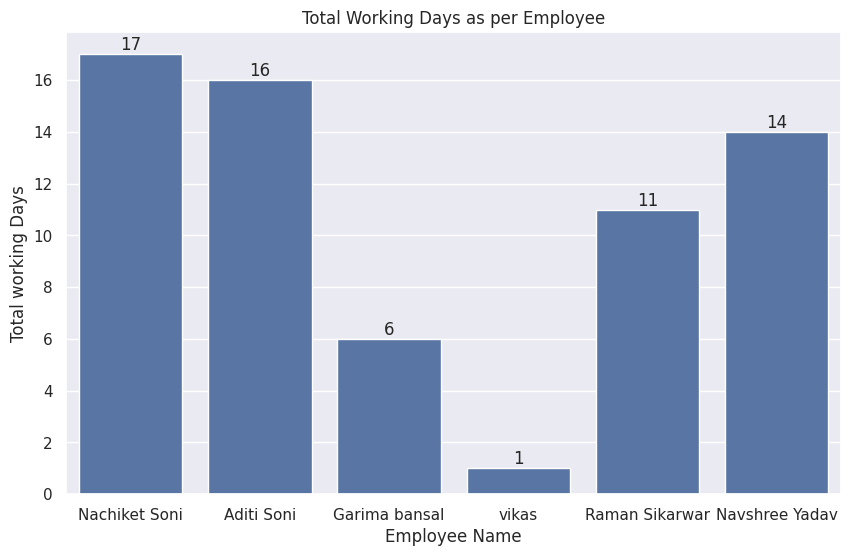

In [ ]:
sns.set(rc={'figure.figsize':(10, 6)})
ax = sns.countplot(data=df, x='Name ')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Total Working Days as per Employee')
plt.xlabel('Employee Name')
plt.ylabel('Total working Days')
plt.show()

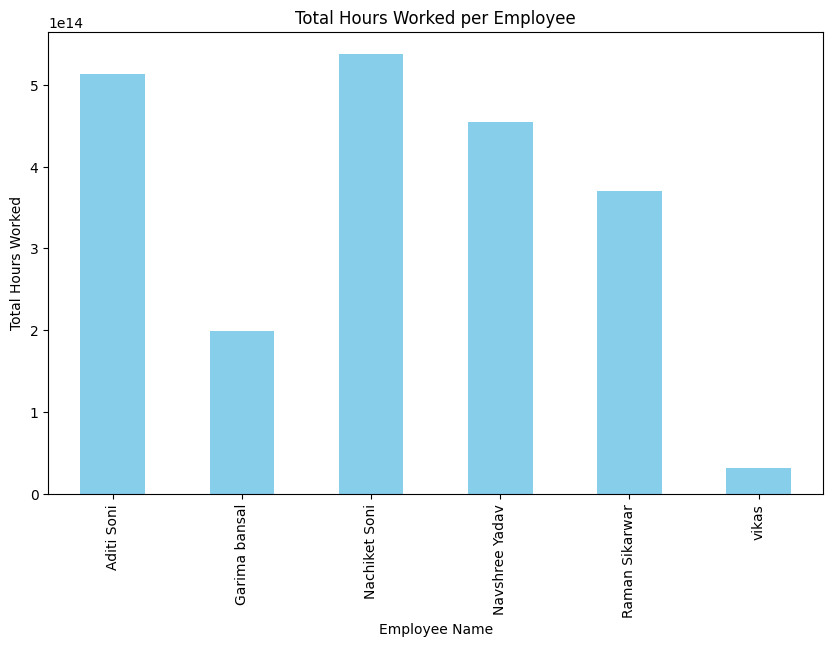

In [ ]:
plt.figure(figsize=(10, 6))
total_hours_worked_per_employee.plot(kind='bar', color='skyblue')
plt.title('Total Hours Worked per Employee')
plt.ylabel('Total Hours Worked')
plt.xlabel('Employee Name')
plt.show()


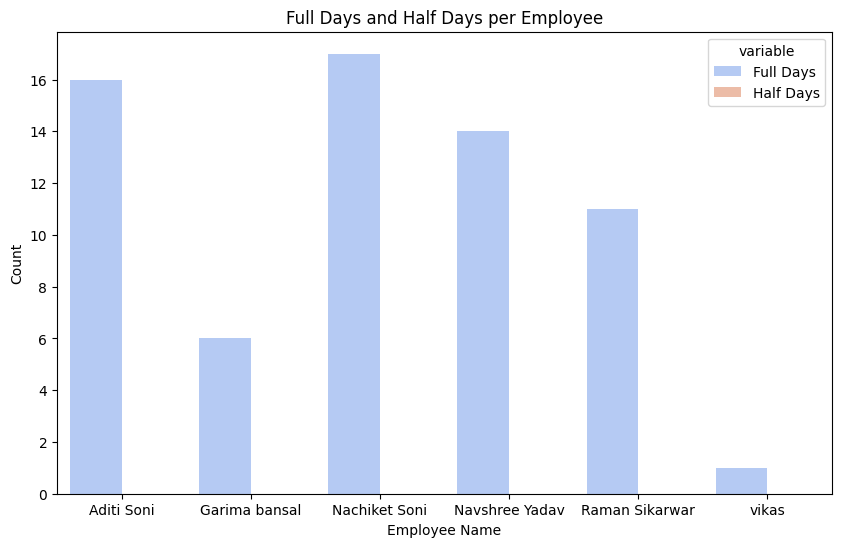

In [ ]:
days_count_per_employee = pd.DataFrame({
    'Full Days': total_full_days_per_employee,
    'Half Days': total_half_days_per_employee
}).reset_index()

days_count_per_employee = pd.melt(days_count_per_employee, id_vars=['Name '], value_vars=['Full Days', 'Half Days'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Name ', y='value', hue='variable', data=days_count_per_employee, palette='coolwarm')
plt.title('Full Days and Half Days per Employee')
plt.ylabel('Count')
plt.xlabel('Employee Name')
plt.show()


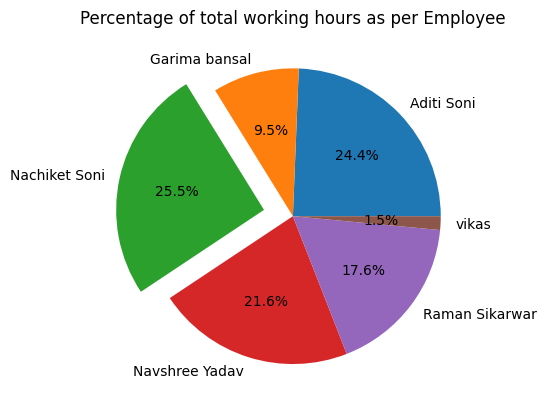

In [ ]:
plt.pie(total_hours_worked_per_employee, labels=total_hours_worked_per_employee.index, autopct='%1.1f%%',explode=(0,0,0.2,0,0,0))
plt.title('Percentage of total working hours as per Employee')
plt.show()

Nachiket has the most working hours in the June month , and after him Aditi is the one who has the most working hours.

## **From all the above Graphs and Data representation it is clear that the best performer on the june Month was Nachiket, he has worked for the most hours and worked for 17 Days in the June Month.**


# After Nachiket Aditi and Navshree did very well as compared to others.